In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
productivity = pd.read_csv('/Users/briandomino/Documents/Google Data Analytics Certificate/capstone project/BeFocused_22Jul2022.csv')

### Clean the data

In [3]:
# Remove the first row, which is blank
productivity.drop([0], inplace = True)

In [4]:
# Remove the two unneeded columns
productivity.drop(columns=[' Duration',  ' Task state '], inplace = True)

In [5]:
# Remove the leading space in the column name
# Use list(productivity) to see this
productivity.rename(columns={' Assigned task': 'task', 'Start date': 'date'}, inplace = True)

In [6]:
# Separate date and time
productivity[['date','Time']] = productivity['date'].str.split(' at ', expand = True)

In [7]:
# Convert the date from string into datetime format
productivity['date'] = pd.to_datetime(productivity['date'], format = '%b %d %Y')

In [8]:
productivity.to_csv('cleaned_productivity.csv')

## How diverse is each day (i.e., how many different tasks are completed)?

In [9]:
task_diversity = productivity.groupby('date')['task'].nunique()

In [10]:
monthly_diversity = task_diversity.groupby(pd.Grouper(freq='M')).mean()

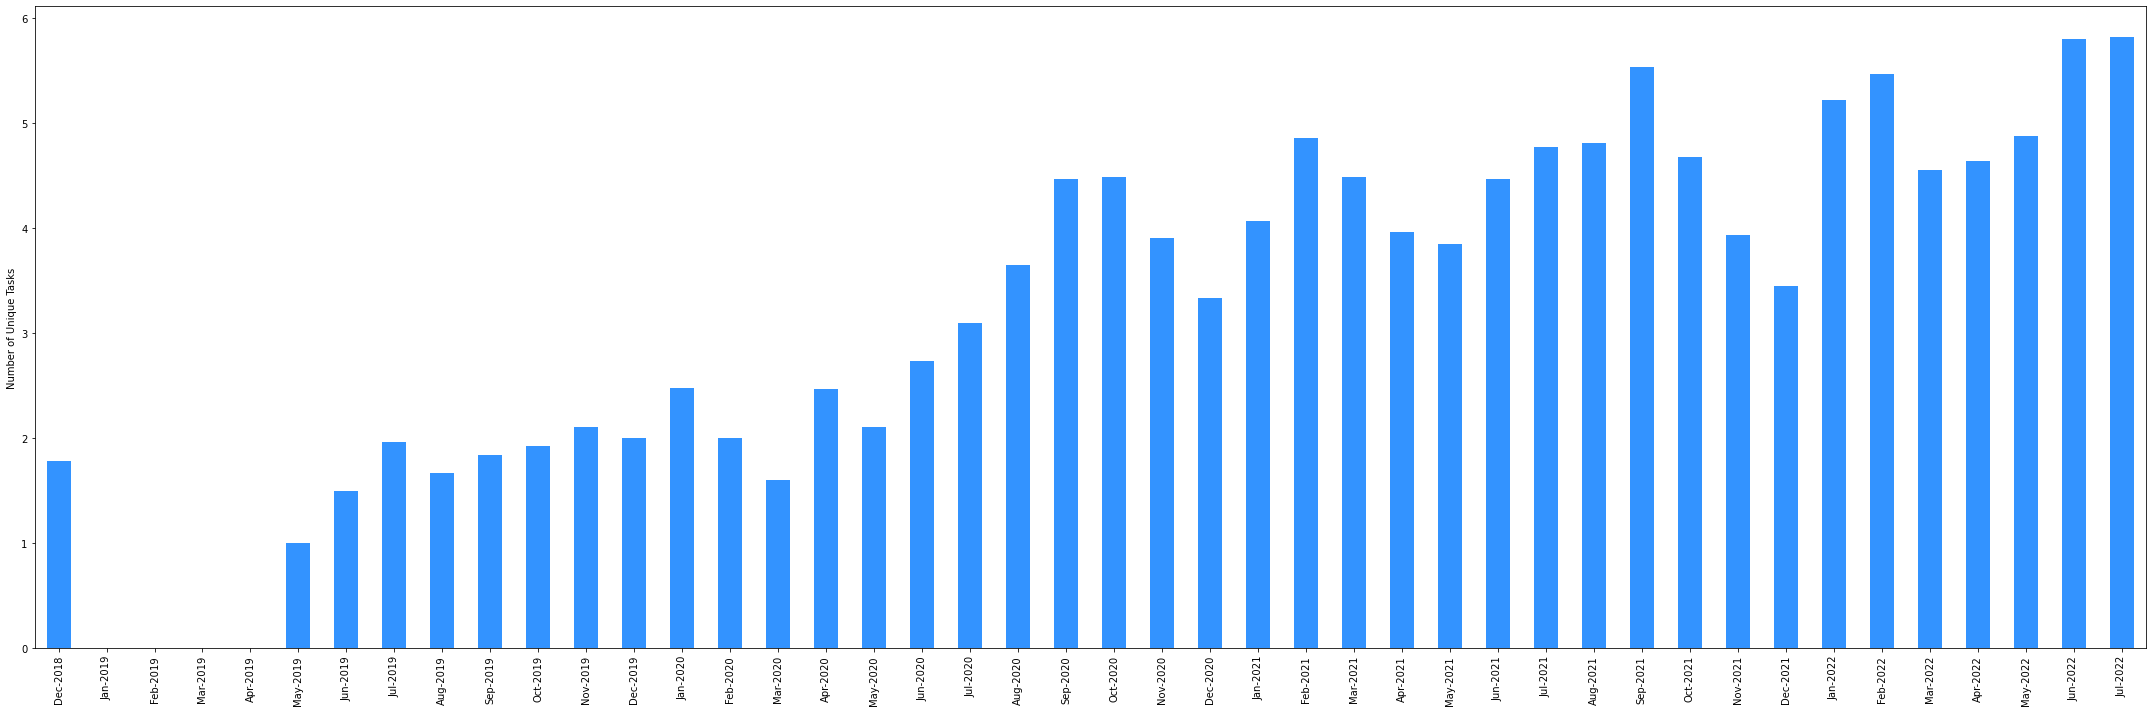

In [11]:
# Uncomment below to save plot

monthly_diversity.plot(kind = 'bar', color = '#3393FF',
                       figsize = (30,10)).set_xticklabels(monthly_diversity.index.strftime('%b-%Y').unique())

plt.ylabel('Number of Unique Tasks')
plt.xlabel('')
plt.tight_layout()
# plt.savefig('monthly_task_diversity.png',dpi=300)
plt.show()

## Were above average days due to work?

### calculate the total number of intervals completed by date

In [12]:
raw_data = productivity.copy()

In [13]:
# raw_data.rename(columns={'Start date': 'date'}, inplace = True)

In [14]:
all_intervals = raw_data.groupby('date')['task'].count()

In [15]:
all_intervals.rename('all_tasks', inplace = True)

date
2018-12-06     2
2018-12-07     1
2018-12-08     3
2018-12-09     2
2018-12-10     2
              ..
2022-07-18    20
2022-07-19    16
2022-07-20    13
2022-07-21    20
2022-07-22     5
Name: all_tasks, Length: 1026, dtype: int64

In [16]:
only_work = raw_data.copy()

In [17]:
only_work = only_work[only_work['task'].isin(['work, ~teaching', 'PHL131'])]

In [18]:
just_work = only_work.groupby('date')['task'].count()

In [19]:
only_work.rename(columns={'task': 'only_work'}, inplace = True)

In [20]:
result = pd.merge(all_intervals, just_work, left_index = True, right_index = True, how='left')

In [21]:
result.rename(columns = {'all_tasks': 'all', 'task': 'work_only'}, inplace = True)

In [22]:
result['work_only'].fillna(0, inplace = True)

In [23]:
result['all'] = result['all'].astype(float)

In [24]:
result['pc_work'] = (result['work_only'] / result['all'])

In [25]:
opening = 'The average contribution of work-related intervals to '

x1 = result[result['all'] > 9].pc_work.mean()
print(f'{opening}above-average days (i.e., intervals completed > 9) is {x1:2.2%}.')

x2 = result[result['all'] > 15].pc_work.mean()
print(f'{opening}highly productive days (intervals completed > 15) is {x2:2.2%}.')

x3 = result[result.pc_work == 1.0].work_only.mean()
print(f'The average number of intervals completed when work was all I did is {x3:.2}.')

The average contribution of work-related intervals to above-average days (i.e., intervals completed > 9) is 25.05%.
The average contribution of work-related intervals to highly productive days (intervals completed > 15) is 19.07%.
The average number of intervals completed when work was all I did is 3.6.
